**Оглавление:**
1. [Описание проекта](#описание)
2. [Часть 1](#1)
3. [Загрузка данных](#загрузка)
4. [Предобработка данных](#предобработка)
5. [Исследовательский анализ данных](#исследовательский)
6. [Корреляционный анализ признаков](#корреляция)
7. [Подготовка данных](#подготовка)
8. [Обучение моделей](#обучение)
9. [Выводы по первой части](#вывод1)
10. [Часть 2](#2)
11. [Загрузка данных 2](#загрузка2)
12. [Предобработка данных 2](#предобработка2)
13. [Исследовательский анализ данных 2](#исследовательский2)
14. [Корреляционный анализ признаков 2](#корреляция2)
15. [Подготовка данных 2](#подготовка2)
16. [Обучение моделей 2](#обучение2)
17. [Выводы по второй части](#вывод2)
18. [Выводы по проекту](#вывод3)

# Описание проекта
<a id="описание"></a>

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

У вас будет несколько задач:
* Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
* Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Описание данных:**

**Часть 1:**

train_job_satisfaction_rate.csv:

* id — уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника;
* job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

test_features.csv: 

* id — уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника;

test_target_job_satisfaction_rate.csv:

* id — уникальный идентификатор сотрудника;
* job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.  

**Часть 2:**


train_job_satisfaction_rate.csv:

* id — уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника;
* quit — увольнение сотрудника из компании.

test_features.csv:

* id — уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника;

test_target_quit.csv:

* id — уникальный идентификатор сотрудника;
* quit — увольнение сотрудника из компании.

# Часть 1
<a id="1"></a>

# Загрузка данных
<a id="загрузка"></a>

In [1]:
!pip install -U scikit-learn
!pip install -q phik
!pip install -q shap

     |████████████████████████████████| 13.5 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 102.1 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
from scipy import stats as st

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    recall_score,
    r2_score,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay,
    make_scorer
)
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [3]:
RANDOM_STATE = 42

In [4]:
data_train_jsr = pd.read_csv("/datasets/train_job_satisfaction_rate.csv")
data_test_features = pd.read_csv("/datasets/test_features.csv")
data_test_jsr = pd.read_csv("/datasets/test_target_job_satisfaction_rate.csv")

In [5]:
display(data_train_jsr)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


In [6]:
data_train_jsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [7]:
display(data_test_features)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [8]:
data_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [9]:
display(data_test_jsr)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
...,...,...
1995,405257,0.28
1996,370925,0.21
1997,857722,0.39
1998,303402,0.26


In [10]:
data_test_jsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


**Итоги по обзору данных:**
* Присутствуют пропуски в dept и level тренировочной и тестовой выборки 
* Никаких проблем с названиями и форматом столбцов 
* Формат данных соответствует описанию датасета

# Предобработка данных
<a id="предобработка"></a>

In [11]:
data_train_jsr.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Мы имеем 6 пропусков в dept и 4 пропуска в level. Нужно внимательно изучить эти данные

In [12]:
data_train_jsr[data_train_jsr.isna().any(axis=1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


Возможные причины пропусков:
* данные могли быть банально не заполнены в ходе прохождения опросника.
* данные могли быть искажены или удалены в процессе обработки.

Мы заполним их в пайплайне

In [13]:
data_test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [14]:
data_test_features[data_test_features.isna().any(axis=1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


Аналогично поступим тут, все пропуски будут обработаны в пайплайне.

In [15]:
data_test_jsr.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [16]:
def print_duplicates(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            print(f"{col}: {data[col].unique()}")

In [17]:
print_duplicates(data_train_jsr)

dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'high' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']


In [18]:
print_duplicates(data_test_features)

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'low' 'high' ' ']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']


In [19]:
display(data_test_features.query("dept == ' '"))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


In [20]:
display(data_test_features.query("workload == ' '"))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


Неявные дубликаты отсутствуют, но в test_features.csv присутствуют 2 значения, которые имеют пустые значения. Превратим эти значения в Nan, чтобы обработать их на этапе пайплайна.

In [21]:
data_test_features.replace(' ', np.nan, inplace=True)

In [22]:
print_duplicates(data_test_features)

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'low' 'high' nan]
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']


In [23]:
data_test_jsr.duplicated().sum()

0

In [24]:
data_test_features.duplicated().sum()

0

In [25]:
data_test_jsr.duplicated().sum()

0

Явных дубликатов нет

**Итоги по предобработке данных:**
* Все пропуски будут обработаны на этапе пайплайна
* Неявные дубликаты отсутствуют
* Пустые значения в тестовой выборке были заменены на Nan для дальнейшей обработки
* Явных дубликатов нет

# Исследовательский анализ данных
<a id="исследовательский"></a>

In [26]:
def plot_hist(data, name, number, x_beg = None, x_end = None):
    data[name].plot(kind="hist", bins = number, figsize=(8,5), title=f"Гистограмма для '{name}'", grid = True, edgecolor = "black")
    plt.xlabel(f"{name}")
    plt.ylabel("Частота")
    if x_beg is not None and x_end is not None:
        plt.xlim(x_beg, x_end)
    plt.show()

In [27]:
def plot_box(data, name, lower, upper):
    plt.ylim(lower, upper)
    data.boxplot(name)

In [28]:
def plot_pie(data, name):
    count = data[name].value_counts()
    plt.figure(figsize=(10, 5))
    count.plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Круговая диаграмма для '{name}'")
    plt.ylabel('')
    plt.show()

In [29]:
data_train_jsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


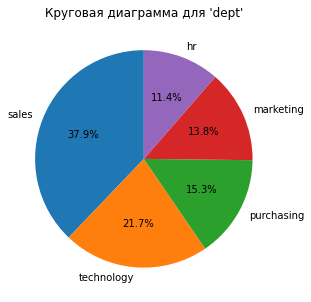

In [30]:
plot_pie(data_train_jsr, "dept")

Мы видим, что большая часть сотрудников приходится на отдел продаж (37.9%), далее по популярности идут отделы технологий (21.7%), закупок (15.3%) и маркетинга (13.8%). Самым малочисленным отделом является HR (11.4%)

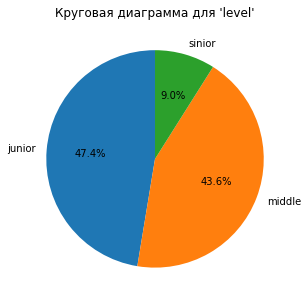

In [31]:
plot_pie(data_train_jsr, "level")

Диаграмма показывает, что доля junior (47.4%) и middle (43.6%) примерно равны. Меньше всего senior (9%), так как они самые опытные и профессиональные сотрудники компании.

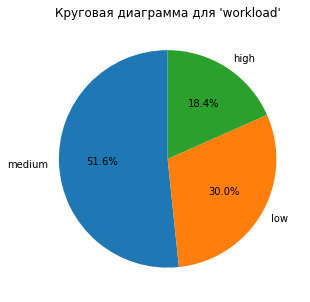

In [32]:
plot_pie(data_train_jsr, "workload")

Диаграмма загруженности показывает, что чуть больше половины сотрудников имеют среднюю степень занятости (51.6%). Высокую и низкую степень занятости имеют 18.4% и 30% сотрудников соотвественно.

In [33]:
workload = data_train_jsr.groupby(['workload', 'level']).size().reset_index(name='count')

In [34]:
display(workload)

,workload,level,count
0,high,junior,184
1,high,middle,436
2,high,sinior,114
3,low,junior,615
4,low,middle,516
5,low,sinior,68
6,medium,junior,1095
7,medium,middle,792
8,medium,sinior,176


Мы видим, что большая часть сотрудников каждого уровня имеют среднюю степень загруженности. Далее все кроме senior имеют низкую загруженность и наконец наименьшее количество сотрудников каждого уровня имеют высокую степень загруженности(кроме senior). Такое распределение является довольно обычным для компании.

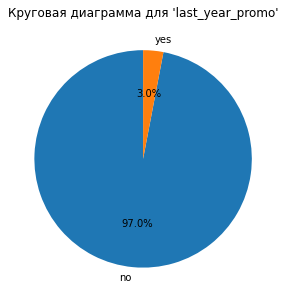

In [35]:
plot_pie(data_train_jsr, "last_year_promo")

Только 3% сотрудников получили повышение за последний год

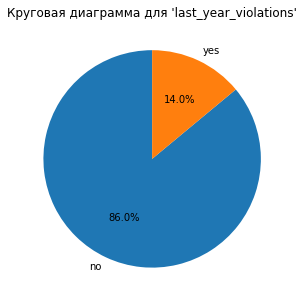

In [36]:
plot_pie(data_train_jsr, "last_year_violations")

Только 14% сотрудников нарушили трудовой договор за последний год

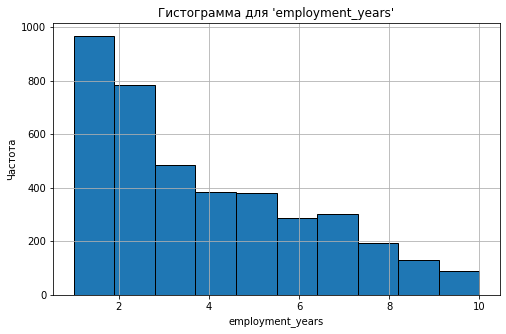

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

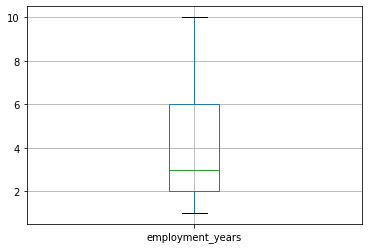

In [37]:
plot_hist(data_train_jsr, "employment_years", 10)
plot_box(data_train_jsr, "employment_years", 0.5, 10.5)
data_train_jsr["employment_years"].describe()

Мы видим убывающий график длительности работы в компании. Такое распределение логично, так как количество сотрудников с большим стажем работы будет уменьшаться. Медианное значение равно 3 года, когда максимальное и минимальное 1 и 10 лет соответственно.

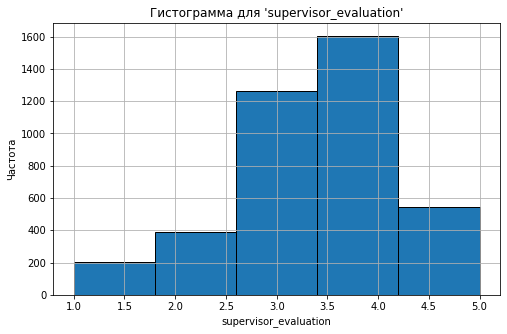

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

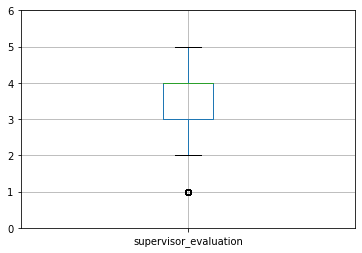

In [38]:
plot_hist(data_train_jsr, "supervisor_evaluation", 5)
plot_box(data_train_jsr, "supervisor_evaluation", 0, 6)
data_train_jsr["supervisor_evaluation"].describe()

Большинство сотрудников компании имеют качество оценки работы 4. Меньше и больше всего 1 и 5 соответственно. График с усами показывает, что сотрудники, которые получили оценку 1 являются выбросами, но такая оценка допустима в рамках работы в компании.

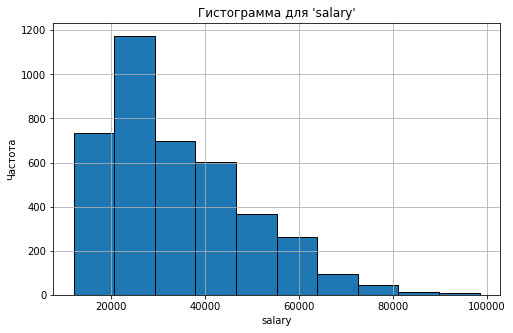

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

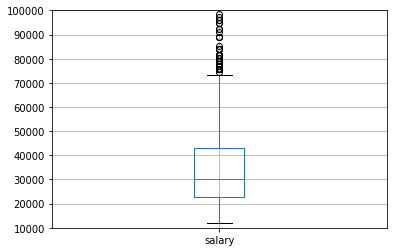

In [39]:
plot_hist(data_train_jsr, "salary", 10)
plot_box(data_train_jsr, "salary", 10000, 100000)
data_train_jsr["salary"].describe()

График зарплат в компании не выбивается из логики и совпадает с обычным распределением зарплат в любой компании. Чем больше зарплата тем меньше сотрудников. Медианное значение равно 30000 рублей, когда максимальное и минимальное 98400 и 12000 рублей соответственно. Несмотря на график с усами зарплата выше 72000 не являются выбросами, так как высокая зарплата типична для компании.

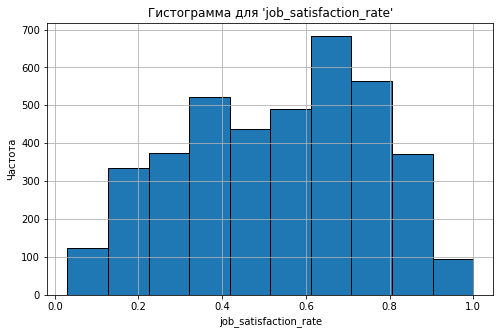

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

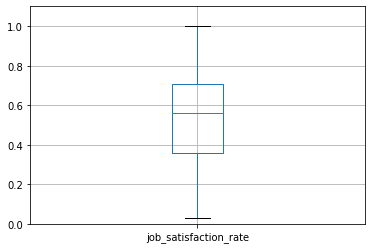

In [40]:
plot_hist(data_train_jsr, "job_satisfaction_rate", 10)
plot_box(data_train_jsr, "job_satisfaction_rate", 0, 1.1)
data_train_jsr["job_satisfaction_rate"].describe()

Распределение уровня удовлетворенности похоже на нормальное, но присутствует небольшое смещение в сторону более высокого уровня. Медианное значение целевого признака равно 0.56, а максимальное и минимальное значение равно 0.03 и 1 соответственно.

* Категориальные признаки надо будет закодировать через OneHotEncoder
* level и workload придется закодировать через OrdinalEncoder, так как они являются ранговыми признаками
* Все числовые признаки придется масштабировать, так как например salary и employment_years имеют разный диапазон значений

**Итоги по исследовательскому анализу данных:**
* Мы видим, что большая часть сотрудников приходится на отдел продаж (37.9%), далее по популярности идут отделы технологий (21.7%), закупок (15.3%) и маркетинга (13.8%). Самым малочисленным отделом является HR (11.4%)
* Доля junior (47.4%) и middle (43.6%) примерно равны. Меньше всего senior (9%), так как они самые опытные и профессиональные сотрудники компании.
* Больше половины сотрудников имеют среднюю степень занятости (51.6%). Высокую и низкую степень занятости имеют 18.4% и 30% сотрудников соотвественно
* Только 3% сотрудников получили повышение за последний год
* Только 14% сотрудников нарушили трудовой договор за последний год
* График длительности работы в компании уменьшается, что логично для компании. Сотрудников с большим стажем работы будет меньше чем с маленьким. Медианное значение равно 3 года, когда максимальное и минимальное 1 и 10 лет соответственно.
* Большинство сотрудников компании имеют качество оценки работы 4. Меньше и больше всего 1 и 5 соответственно.
* График зарплат в компании не выбивается из логики и совпадает с обычным распределением зарплат в любой компании. Чем больше зарплата тем меньше сотрудников. Медианное значение равно 30000 рублей, когда максимальное и минимальное 98400 и 12000 рублей соответственно.
* Распределение уровня удовлетворенности похоже на нормальное, но присутствует небольшое смещение в сторону более высокого уровня. Медианное значение целевого признака равно 0.56, а максимальное и минимальное значение равно 0.03 и 1 соответственно.

# Корреляционный анализ признаков
<a id="корреляция"></a>

In [41]:
data_test_features.shape

(2000, 9)

In [42]:
data_test_jsr.shape

(2000, 2)

In [43]:
data_test = data_test_features.merge(data_test_jsr, on = 'id', how='inner')

In [44]:
display(data_test)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75
...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.56
1996,109582,technology,middle,low,3,no,no,2,21600,0.14
1997,305653,technology,junior,low,1,no,no,3,14400,0.11
1998,160233,technology,middle,low,8,no,no,1,32400,0.43


In [45]:
data_test.shape

(2000, 10)

In [46]:
num_cols = []

In [47]:
for col in data_train_jsr.columns:
    if ((data_train_jsr[col].dtype == 'int64' or data_train_jsr[col].dtype == 'float64') and (col != 'id')):
        num_cols.append(col)

In [48]:
phik_train = data_train_jsr.drop(columns = "id")

In [49]:
phik_overview = phik_train.phik_matrix(interval_cols=num_cols)

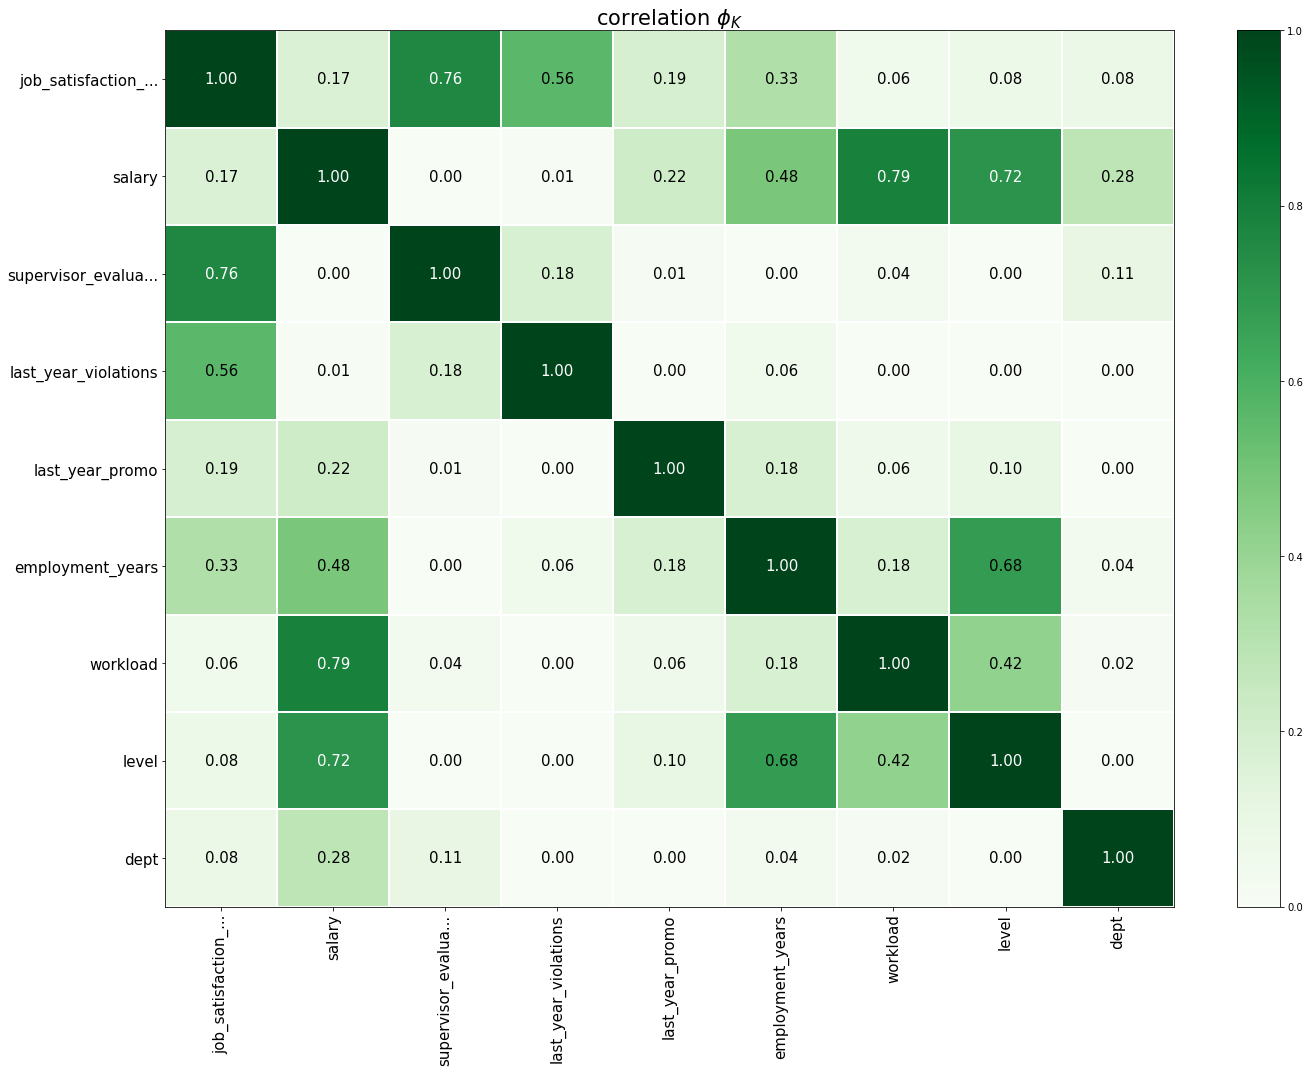

In [50]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Корреляционный анализ тренировочной выборки показывает:
1. Больше всего на целевой признак оказывают влияние supervisor_evaluation и last_year_violations с коэффициентами 0.76 и 0.56 соответственно.
2. Сильную связь между признаками имеют cледующие пары признаков:
* salary и workload - 0.79
* salary и level - 0.72
* employment_years и level - 0.68
3. Такая связь объясняется логически, так как зарплата зависит от уровня профессионализма и количества работы. Также уровень занимаемой должности зависит от продолжительности работы в компании.
4. Мультиколлинеарности не наблюдается

In [51]:
phik_test = data_test.drop(columns = "id")

In [52]:
phik_overview = phik_test.phik_matrix(interval_cols=num_cols)

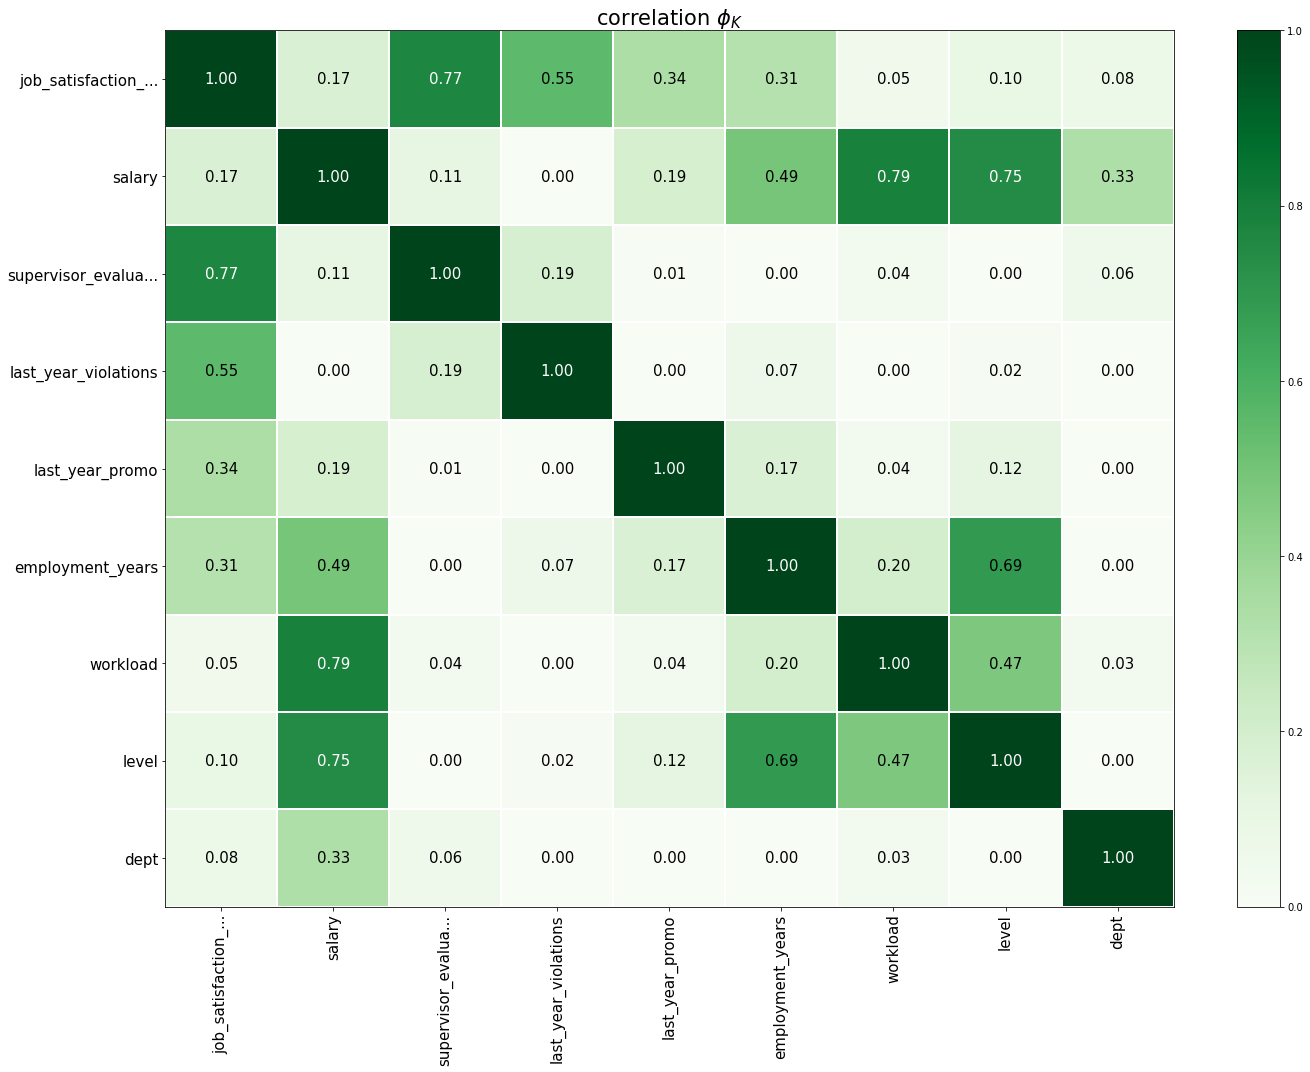

In [53]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

В тестовой выборке отклонений не наблюдается, все зависимости такие же как и в тренировочной. Из значимого изменения только то, что last_year_promo теперь оказывает большее влияние на целевой признак

**Итоги по корреляционному анализу признаков:**
1. Больше всего на целевой признак оказывают влияние supervisor_evaluation и last_year_violations с коэффициентами 0.76 и 0.56 соответственно.
2. Сильную связь между признаками имеют cледующие пары признаков:
* salary и workload - 0.79
* salary и level - 0.72
* employment_years и level - 0.68
3. Такая связь объясняется логически, так как зарплата зависит от уровня профессионализма и количества работы. Также уровень занимаемой должности зависит от продолжительности работы в компании.
4. Мультиколлинеарности не наблюдается
5. В тестовой выборке отклонений не наблюдается, все зависимости такие же как и в тренировочной. Из значимого изменения только то, что last_year_promo теперь оказывает большее влияние на целевой признак

# Подготовка данных
<a id="подготовка"></a>

In [54]:
X_train = data_train_jsr.drop(['id', 'job_satisfaction_rate'], axis=1)
y_train = data_train_jsr['job_satisfaction_rate']

In [55]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']

In [56]:
categories = [
    ['junior', 'middle', 'senior'],  
    ['low', 'medium', 'high']       
]

In [57]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [58]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',OrdinalEncoder(
                categories=categories,
                handle_unknown = 'use_encoded_value', unknown_value = np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [59]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [60]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [61]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [LinearRegression()],  
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [62]:
def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

In [63]:
smape_score = make_scorer(smape, greater_is_better = False)

In [64]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_score,
    random_state = RANDOM_STATE,
    n_jobs=-1
)

# Обучение моделей
<a id="обучение"></a>

In [65]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                   param_distributions=[{'models': [DecisionTreeRegressor(random_state=42)],
                                         'models__max_depth': range(2, 15),
                                         'models__max_features': range(2, 15),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [66]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [67]:
X_test = data_test.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test = data_test["job_satisfaction_rate"]

In [68]:
y_test_pred = randomized_search.best_estimator_.predict(X_test)
smape(y_test, y_test_pred)

14.351153234003124

**Итоги по обучении модели:**
* Лучшая модель: DecisionTreeRegressor(max_depth=14, max_features=14)
* Мы использовали метрику SMAPE с критерием успеха SMAPE <= 15 на тестовой выборке
* Метрика лучшей модели на тренировочной выборке: -15.164532410127666
* Метрика на тестовой выборке: 14.351153234003124

# Выводы по первой части
<a id="вывод1"></a>

**Итоги по обзору данных:**
* Присутствуют пропуски в dept и level тренировочной и тестовой выборки 
* Никаких проблем с названиями и форматом столбцов 
* Формат данных соответствует описанию датасета

**Итоги по предобработке данных:**
* Все пропуски будут обработаны на этапе пайплайна
* Неявные дубликаты отсутствуют
* Пустые значения в тестовой выборке были заменены на Nan для дальнейшей обработки
* Явных дубликатов нет

**Итоги по исследовательскому анализу данных:**
* Мы видим, что большая часть сотрудников приходится на отдел продаж (37.9%), далее по популярности идут отделы технологий (21.7%), закупок (15.3%) и маркетинга (13.8%). Самым малочисленным отделом является HR (11.4%)
* Доля junior (47.4%) и middle (43.6%) примерно равны. Меньше всего senior (9%), так как они самые опытные и профессиональные сотрудники компании.
* Больше половины сотрудников имеют среднюю степень занятости (51.6%). Высокую и низкую степень занятости имеют 18.4% и 30% сотрудников соотвественно
* Только 3% сотрудников получили повышение за последний год
* Только 14% сотрудников нарушили трудовой договор за последний год
* График длительности работы в компании уменьшается, что логично для компании. Сотрудников с большим стажем работы будет меньше чем с маленьким. Медианное значение равно 3 года, когда максимальное и минимальное 1 и 10 лет соответственно.
* Большинство сотрудников компании имеют качество оценки работы 4. Меньше и больше всего 1 и 5 соответственно.
* График зарплат в компании не выбивается из логики и совпадает с обычным распределением зарплат в любой компании. Чем больше зарплата тем меньше сотрудников. Медианное значение равно 30000 рублей, когда максимальное и минимальное 98400 и 12000 рублей соответственно.
* Распределение уровня удовлетворенности похоже на нормальное, но присутствует небольшое смещение в сторону более высокого уровня. Медианное значение целевого признака равно 0.56, а максимальное и минимальное значение равно 0.03 и 1 соответственно.

**Итоги по корреляционному анализу признаков:**
1. Больше всего на целевой признак оказывают влияние supervisor_evaluation и last_year_violations с коэффициентами 0.76 и 0.56 соответственно.
2. Сильную связь между признаками имеют cледующие пары признаков:
* salary и workload - 0.79
* salary и level - 0.72
* employment_years и level - 0.68
3. Такая связь объясняется логически, так как зарплата зависит от уровня профессионализма и количества работы. Также уровень занимаемой должности зависит от продолжительности работы в компании.
4. Мультиколлинеарности не наблюдается
5. В тестовой выборке отклонений не наблюдается, все зависимости такие же как и в тренировочной. Из значимого изменения только то, что last_year_promo теперь оказывает большее влияние на целевой признак

**Итоги по обучении модели:**
* Лучшая модель: DecisionTreeRegressor(max_depth=14, max_features=14)
* Мы использовали метрику SMAPE с критерием успеха SMAPE <= 15 на тестовой выборке
* Метрика лучшей модели на тренировочной выборке: -15.164532410127666
* Метрика на тестовой выборке: 14.351153234003124

# Часть 2
<a id="2"></a>

# Загрузка данных 2
<a id="загрузка2"></a>

In [69]:
data_train_quit = pd.read_csv("/datasets/train_quit.csv")
data_test_quit = pd.read_csv("/datasets/test_target_quit.csv")

In [70]:
display(data_train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


In [71]:
data_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [72]:
display(data_test_quit)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


In [73]:
data_test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Итоги по обзору данных:**
* Пропусков нет
* Никаких проблем с названиями и форматом столбцов 
* Формат данных соответствует описанию датасета

# Предобработка данных 2
<a id="предобработка2"></a>

In [74]:
print(data_train_quit.isna().sum())

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


In [75]:
print(data_test_quit.isna().sum())

id      0
quit    0
dtype: int64


Пропусков нет

In [76]:
print_duplicates(data_train_quit)

dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level: ['middle' 'junior' 'sinior']
workload: ['high' 'medium' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
quit: ['no' 'yes']


Неявных дубликатов нет

In [77]:
data_train_quit.duplicated().sum()

0

In [78]:
data_test_quit.duplicated().sum()

0

Явных дубликатов нет

**Итоги по предобработке данных:**
* Пропусков нет
* Неявных дубликатов нет
* Явных дубликатов нет

# Исследовательский анализ данных 2
<a id="исследовательский2"></a>

In [79]:
display(data_train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


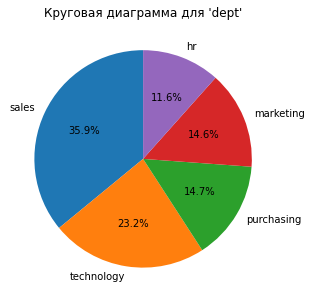

In [80]:
plot_pie(data_train_quit, 'dept')

Мы видим, что большая часть сотрудников приходится на отдел продаж (35.9%), далее по популярности идут отделы технологий (23.2%), закупок (14.7%) и маркетинга (14.6%). Самым малочисленным отделом является HR (11.6%)

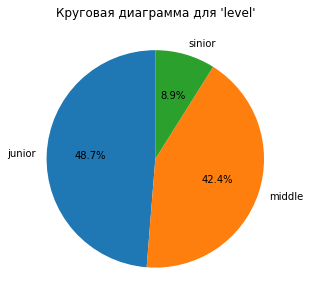

In [81]:
plot_pie(data_train_quit, 'level')

Доля junior (48.7%) и middle (42.4%). Меньше всего senior (8.9%), так как они самые опытные и профессиональные сотрудники компании.

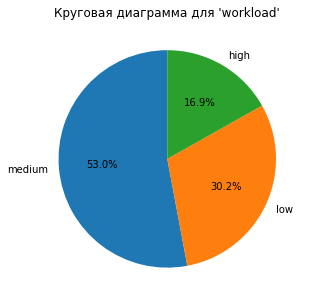

In [82]:
plot_pie(data_train_quit, 'workload')

Больше половины сотрудников имеют среднюю степень занятости (53%). Высокую и низкую степень занятости имеют 16.9% и 30.2% сотрудников соотвественно

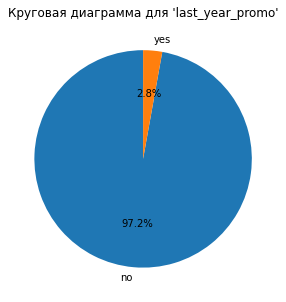

In [83]:
plot_pie(data_train_quit, 'last_year_promo')

Только 2.8% сотрудников получили повышение за последний год

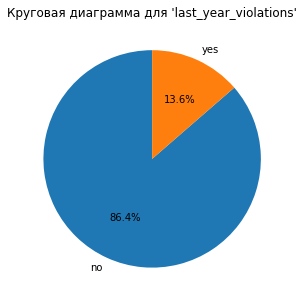

In [84]:
plot_pie(data_train_quit, 'last_year_violations')

Только 13.6% сотрудников нарушили трудовой договор за последний год

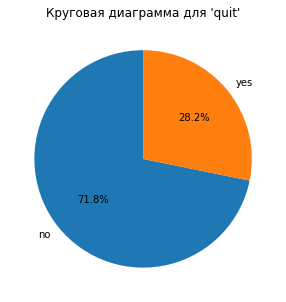

In [85]:
plot_pie(data_train_quit, 'quit')

Оценка целевого признака показывает, что 28.2% сотрудников уволились из компании. Можем наблюдать явный дисбаланс классов, возьмем на заметку.

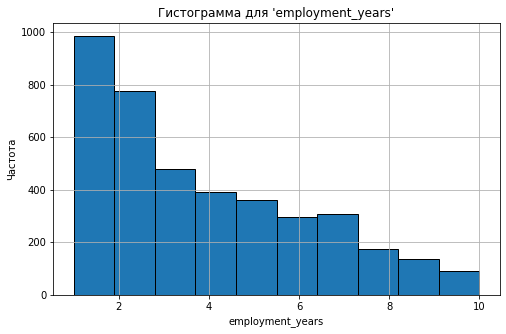

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

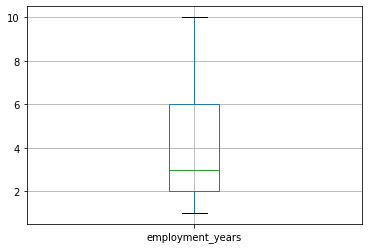

In [86]:
plot_hist(data_train_quit, "employment_years", 10)
plot_box(data_train_quit, "employment_years", 0.5, 10.5)
data_train_quit["employment_years"].describe()

Мы видим убывающий график длительности работы в компании. Такое распределение логично, так как количество сотрудников с большим стажем работы будет уменьшаться. Медианное значение равно 3 года, когда максимальное и минимальное 1 и 10 лет соответственно.

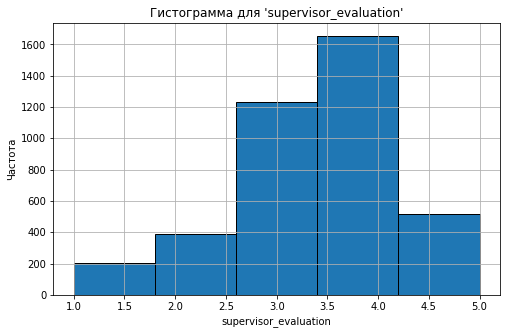

count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

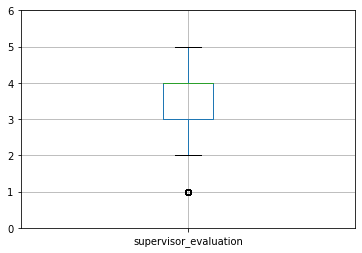

In [87]:
plot_hist(data_train_quit, "supervisor_evaluation", 5)
plot_box(data_train_quit, "supervisor_evaluation", 0, 6)
data_train_quit["supervisor_evaluation"].describe()

Большинство сотрудников компании имеют качество оценки работы 4. Меньше и больше всего 1 и 5 соответственно. График с усами показывает, что сотрудники, которые получили оценку 1 являются выбросами, но такая оценка допустима в рамках работы в компании.

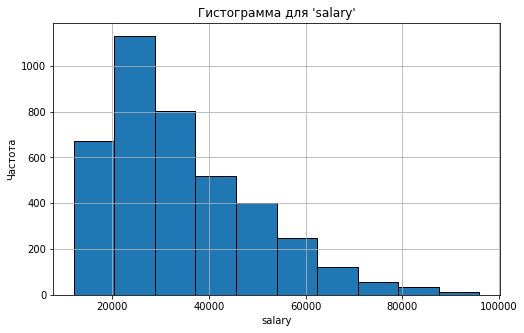

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

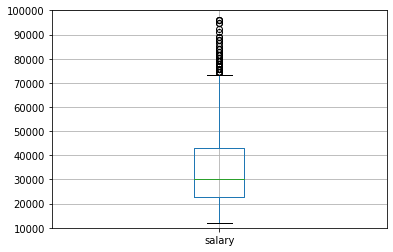

In [88]:
plot_hist(data_train_quit, "salary", 10)
plot_box(data_train_quit, "salary", 10000, 100000)
data_train_quit["salary"].describe()

График зарплат в компании не выбивается из логики и совпадает с обычным распределением зарплат в любой компании. Чем больше зарплата тем меньше сотрудников. Медианное значение равно 30000 рублей, когда максимальное и минимальное 96000 и 12000 рублей соответственно. Несмотря на график с усами зарплата выше 72000 не являются выбросами, так как высокая зарплата типична для компании.

**В целом ничего нового и отличительного от предыдущей тренировочной выборки.**

# Портрет «уволившегося сотрудника»

In [89]:
data_quit = data_train_quit.query('quit == "yes"')

In [90]:
display(data_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes
...,...,...,...,...,...,...,...,...,...,...
3989,150315,purchasing,junior,low,1,no,no,2,15600,yes
3991,778735,technology,junior,low,2,no,no,4,22800,yes
3994,775320,technology,junior,high,1,no,no,4,42000,yes
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes


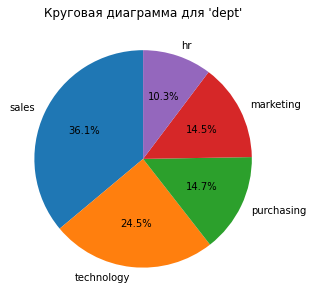

In [91]:
plot_pie(data_quit, 'dept')

В целом такие данные слабо характеризуют портрет уволившегося сотрудника, так как такое же распределение приходится и на общее количество сотрудников. Меньше всего уволившихся сотрудников среди HR, ведь и меньше всего сотрудников состоят в этом отделе. Ситуация с остальными отделами точно такая же. Я считаю, что фактор отдела не должен учитываться вообще.

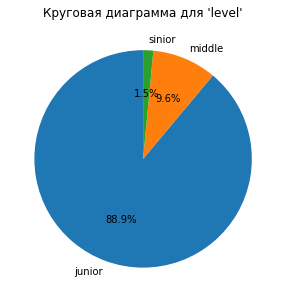

In [92]:
plot_pie(data_quit, 'level')

**Больше всего уходов приходится на junior. Огромная разница с другими уровнями. Вполне логичное соотношение, так как чаще всего именно junior покидают компанию из недостатка знаний, маленькой зарплаты или наоборот**

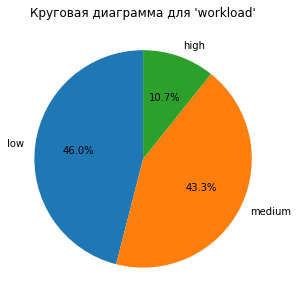

In [93]:
plot_pie(data_quit, 'workload')

**Среди уволившехся сотрудников большинство имели низкую степень занятости**

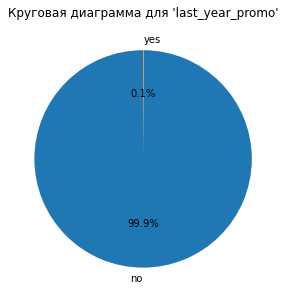

In [94]:
plot_pie(data_quit, 'last_year_promo')

In [95]:
display(data_quit.query("last_year_promo == 'yes'"))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3531,791500,sales,middle,low,6,yes,no,3,27600,yes


Только 1 cотрудник среди 1128 получил повышение.

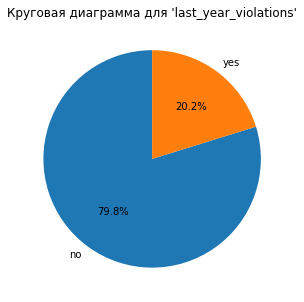

In [96]:
plot_pie(data_quit, 'last_year_violations')

Только 20.2% сотрудников нарушили трудовой договор

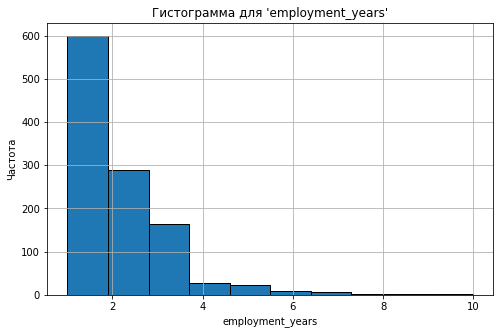

count    1128.000000
mean        1.844858
std         1.274920
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: employment_years, dtype: float64

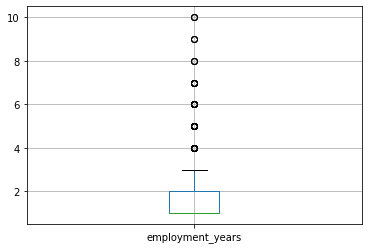

In [97]:
plot_hist(data_quit, "employment_years", 10)
plot_box(data_quit, "employment_years", 0.5, 10.5)
data_quit["employment_years"].describe()

В среднем уволившиеся сотрудники проработали в компании около 1 года.

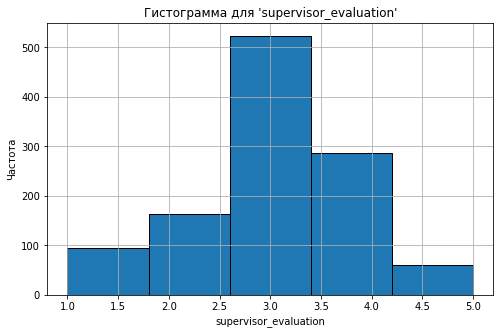

count    1128.000000
mean        3.046099
std         0.973291
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

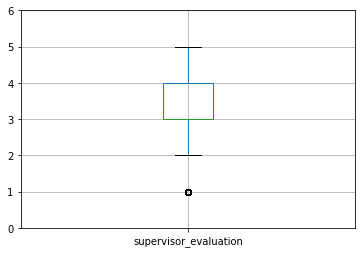

In [98]:
plot_hist(data_quit, "supervisor_evaluation", 5)
plot_box(data_quit, "supervisor_evaluation", 0, 6)
data_quit["supervisor_evaluation"].describe()

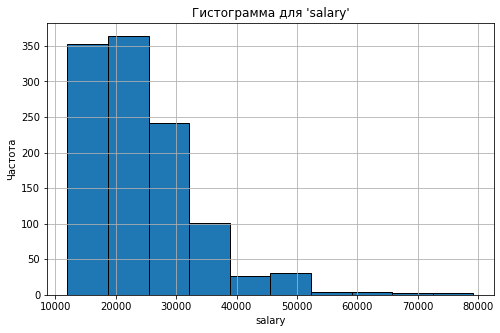

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64

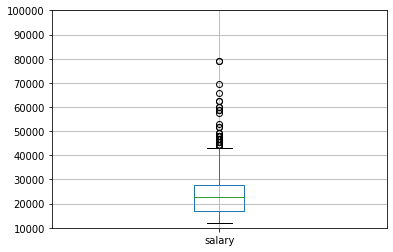

In [99]:
plot_hist(data_quit, "salary", 10)
plot_box(data_quit, "salary", 10000, 100000)
data_quit["salary"].describe()

In [100]:
data_yes = data_train_quit.query("quit == 'no'")

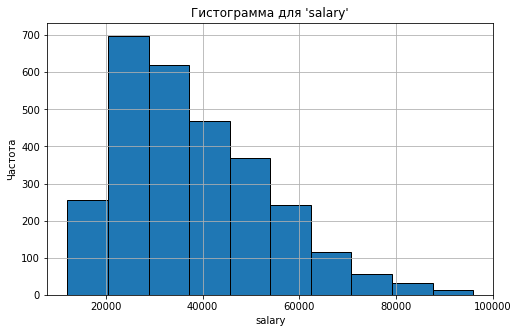

count     2872.000000
mean     37702.228412
std      15218.977339
min      12000.000000
25%      25200.000000
50%      34800.000000
75%      46800.000000
max      96000.000000
Name: salary, dtype: float64

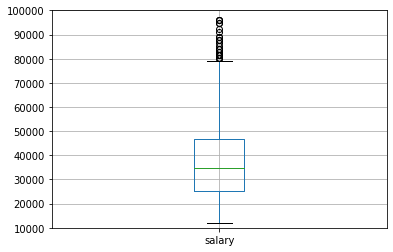

In [101]:
plot_hist(data_yes, "salary", 10)
plot_box(data_yes, "salary", 10000, 100000)
data_yes["salary"].describe()

Среди всех сотрудников медианное значение равно 30000 рублей, а среди уволившихся 22800 рублей, когда максимальное и минимальное значение 79200 и 12000. Но в случае высоких зарплат(выше 40000) это скорее выбросы для нашего портрета. Если сравнить с теми кто остался, то среди них средняя зарплата равна 34800 рублей.

**Портрет уволившегося сотрудника:**

Если собрать основнуюю информацию, то можно выделить следующие моменты:
* Преимущественно junior 
* Имеет низкую степень занятости 
* Проработал в компании около года
* Имеет зарплату около 22800 рублей

# Связь между двумя целевыми признаками

In [102]:
data_quit_merge = data_test_quit.merge(data_test_features, on='id', how='inner')

In [103]:
data = data_quit_merge.merge(data_test[['id', 'job_satisfaction_rate']], on='id', how='left')

In [104]:
display(data)

,id,quit,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,999029,yes,technology,junior,medium,1,no,no,3,31200,0.35
1,372846,no,sales,middle,medium,10,no,yes,2,32400,0.21
2,726767,no,marketing,middle,low,7,no,no,4,20400,0.73
3,490105,no,purchasing,middle,low,7,no,no,4,19200,0.62
4,416898,yes,purchasing,junior,low,1,no,no,4,12000,0.57
...,...,...,...,...,...,...,...,...,...,...,...
1995,836109,yes,sales,junior,high,1,no,no,3,33600,0.61
1996,180999,yes,purchasing,junior,low,2,no,no,4,12000,0.60
1997,746018,no,hr,middle,medium,2,no,no,4,46800,0.70
1998,247658,no,sales,middle,medium,1,no,no,5,38400,0.67


In [105]:
data_quit_yes = data.query("quit == 'yes'")
data_quit_no = data.query("quit == 'no'")

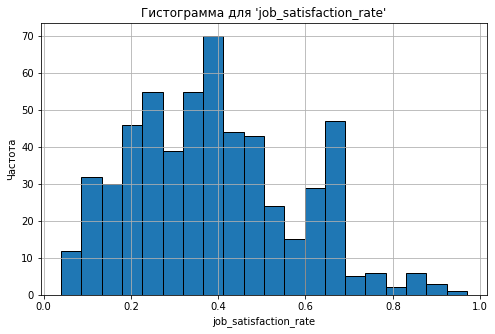

count    564.000000
mean       0.387713
std        0.185784
min        0.040000
25%        0.240000
50%        0.370000
75%        0.492500
max        0.970000
Name: job_satisfaction_rate, dtype: float64

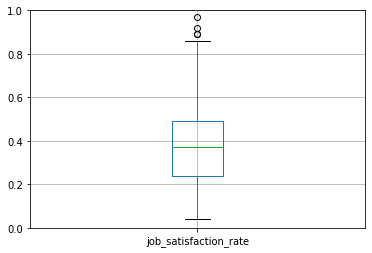

In [106]:
plot_hist(data_quit_yes, "job_satisfaction_rate", 20)
plot_box(data_quit_yes, "job_satisfaction_rate", 0, 1)
data_quit_yes["job_satisfaction_rate"].describe()

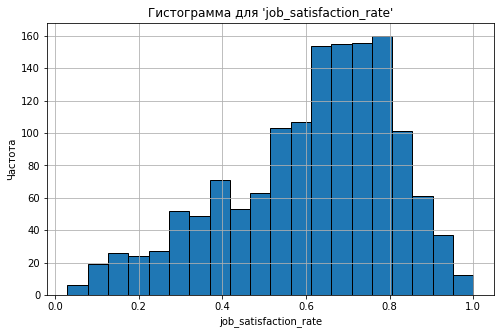

count    1436.000000
mean        0.612040
std         0.199367
min         0.030000
25%         0.500000
50%         0.660000
75%         0.760000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

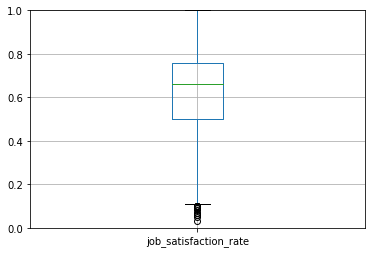

In [107]:
plot_hist(data_quit_no, "job_satisfaction_rate", 20)
plot_box(data_quit_no, "job_satisfaction_rate", 0, 1)
data_quit_no["job_satisfaction_rate"].describe()

Если сравнить распределение уровня удовлетворенности сотрудника работой в компании среди уволившихся и оставшихся сотрудников, то можно сделать следующие выводы:
* График уволившихся сотрудников смещен влево, когда как график оставшихся смещен вправо, что говорит о тенденции к более высокому уровню удовлетворенностью работы
* Медианное значение уволившихся равно 0.37, а оставшихся 0.66, что больше в 1.7 раз
* Для графика уволившихся выбросами считаются значения больше 0.86, а для оставшихся ниже 0.11
* Можно сказать, что чем больше уровень удовлетворенности тем меньше шанс того, что сотрудник уволится из компании.

In [108]:
data_temp = data_train_quit.drop(columns = "quit")

In [109]:
y_jsr = randomized_search.best_estimator_.predict(data_temp)

In [110]:
data_train_quit["job_satisfaction_rate"] = y_jsr

In [111]:
display(data_train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.638750
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.833855
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.380000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.380000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.794667
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.528571
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.841765
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.560000
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.570000


**Cогласно предсказаниям лучшей модели из первой части мы добавили уровень удовлетворенности в тренировочную выборку второй части, так как мы выявили зависимость между двумя целевыми признаками.**

**Итоги по исследовательскому анализу данных:**
* Мы видим, что большая часть сотрудников приходится на отдел продаж (35.9%), далее по популярности идут отделы технологий (23.2%), закупок (14.7%) и маркетинга (14.6%). Самым малочисленным отделом является HR (11.6%)
* Доля junior (48.7%) и middle (42.4%). Меньше всего senior (8.9%), так как они самые опытные и профессиональные сотрудники компании.
* Больше половины сотрудников имеют среднюю степень занятости (53%). Высокую и низкую степень занятости имеют 16.9% и 30.2% сотрудников соотвественно
* Только 2.8% сотрудников получили повышение за последний год
* Только 13.6% сотрудников нарушили трудовой договор за последний год
* Оценка целевого признака показывает, что 28.2% сотрудников уволились из компании. Можем наблюдать явный дисбаланс классов, возьмем на заметку.
* Мы видим убывающий график длительности работы в компании. Такое распределение логично, так как количество сотрудников с большим стажем работы будет уменьшаться. Медианное значение равно 3 года, когда максимальное и минимальное 1 и 10 лет соответственно.
* Большинство сотрудников компании имеют качество оценки работы 4. Меньше и больше всего 1 и 5 соответственно. График с усами показывает, что сотрудники, которые получили оценку 1 являются выбросами, но такая оценка допустима в рамках работы в компании.
* График зарплат в компании не выбивается из логики и совпадает с обычным распределением зарплат в любой компании. Чем больше зарплата тем меньше сотрудников. Медианное значение равно 30000 рублей, когда максимальное и минимальное 96000 и 12000 рублей соответственно. Несмотря на график с усами зарплата выше 72000 не являются выбросами, так как высокая зарплата типична для компании.

**Портрет уволившегося сотрудника:**

Если собрать основнуюю информацию, то можно выделить следующие моменты:
* Преимущественно junior 
* Имеет низкую степень занятости 
* Проработал в компании около года
* Имеет зарплату около 22800 рублей

Если сравнить распределение уровня удовлетворенности сотрудника работой в компании среди уволившихся и оставшихся сотрудников, то можно сделать следующие выводы:
* График уволившихся сотрудников смещен влево, когда как график оставшихся смещен вправо, что говорит о тенденции к более высокому уровню удовлетворенностью работы
* Медианное значение уволившихся равно 0.37, а оставшихся 0.66, что больше в 1.7 раз
* Для графика уволившихся выбросами считаются значения больше 0.86, а для оставшихся ниже 0.11
* Можно сказать, что чем больше уровень удовлетворенности тем меньше шанс того, что сотрудник уволится из компании.

# Корреляционный анализ признаков 2
<a id="корреляция2"></a>

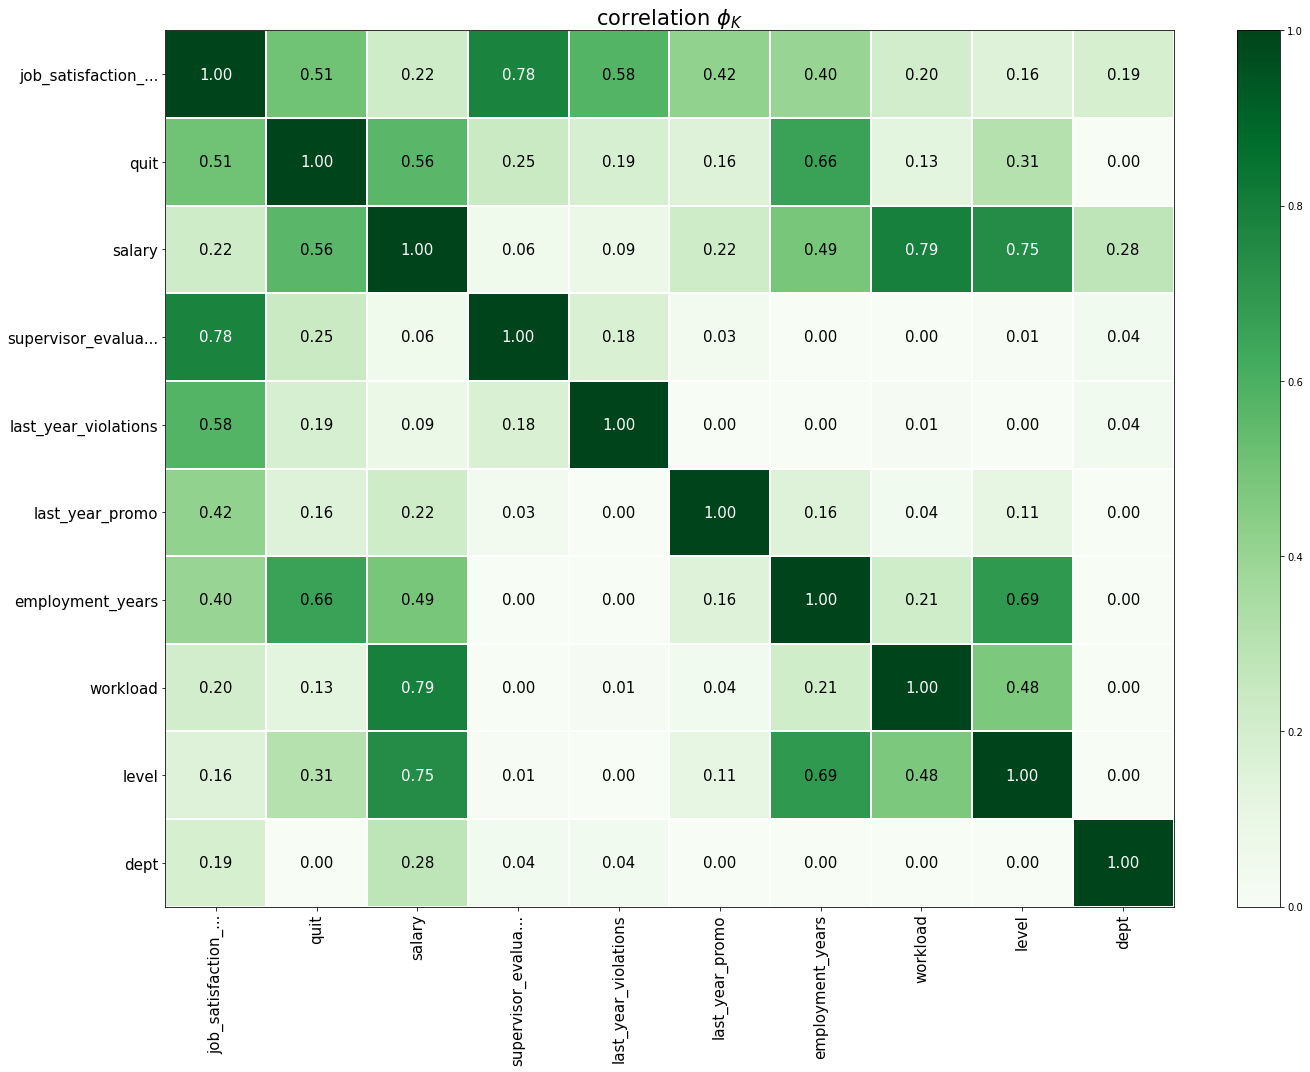

In [112]:
num_cols = []
for col in data_train_quit.columns:
    if ((data_train_quit[col].dtype == 'int64' or data_train_quit[col].dtype == 'float64') and (col != 'id')):
        num_cols.append(col)
phik_train = data_train_quit.drop(columns = "id")
phik_overview = phik_train.phik_matrix(interval_cols=num_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Мы можем сделать вывод, что больше всего на quit влияет employment_years(0.66), salary(0.56) и job_satisfaction_rate(0.51). Не зря добавили его.

**Итоги по корреляционному анализу признаков:**
* Больше всего на quit влияет employment_years(0.66), salary(0.56) и job_satisfaction_rate(0.51)

# Подготовка данных 2
<a id="подготовка2"></a>

In [113]:
X_train = data_train_quit.drop(['id', 'quit'], axis=1)
y_train = data_train_quit['quit']

In [114]:
X_test = data.drop(['id', 'quit'], axis=1)
y_test = data['quit']

In [115]:
y_train.value_counts()

no     2872
yes    1128
Name: quit, dtype: int64

In [116]:
display()

**Как было выявленно раньше, мы имеем явный дизбаланс классов, поэтому лучшей метрикой для нашего случая будет являться ROC-AUC, так как она способна разделять классы вне зависимости от самого баланса классов и нечувствительна к порогам**

In [117]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary', 'supervisor_evaluation', 'job_satisfaction_rate']

In [118]:
categories = [
    ['junior', 'middle', 'senior'],  
    ['low', 'medium', 'high']       
]

In [119]:
ohe_pipe1 = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [120]:
ord_pipe1 = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',OrdinalEncoder(
                categories=categories,
                handle_unknown = 'use_encoded_value', unknown_value = np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [121]:
data_preprocessor1 = ColumnTransformer(
    [('ohe', ohe_pipe1, ohe_columns),
     ('ord', ord_pipe1, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [122]:
pipe_final1 = Pipeline(
    [
        ('preprocessor', data_preprocessor1),
        ('models', DecisionTreeClassifier(random_state = RANDOM_STATE))
    ]
)

In [123]:
param_grid1 = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15), 
        'models__max_features': range(2, 10), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),         
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    {
        'models': [SVC(probability=True, random_state = RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [124]:
randomized_search1 = RandomizedSearchCV(
    pipe_final1, 
    param_grid1, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [125]:
l = LabelEncoder()
y_train = l.fit_transform(y_train)
y_test = l.transform(y_test)

In [126]:
print(f"0: {l.classes_[0]}")
print(f"1: {l.classes_[1]}")

0: no
1: yes


**Теперь мы знаем, что класс 0 соответствует категории прежний уровень, а класс 1 категории снизилась**

# Обучение моделей 2
<a id="обучение2"></a>

In [127]:
randomized_search1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': [0.1, 1, 10, 100],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [128]:
print('Лучшая модель и её параметры:\n\n', randomized_search1.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search1.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [129]:
y_test_proba = randomized_search1.predict_proba(X_test)[:, 1]

In [130]:
y_test_pred = randomized_search1.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba)}')

Метрика ROC-AUC на тестовой выборке: 0.9164975108160965


**Итоги по обучении модели:**
* Лучшей моделью оказалась DecisionTreeClassifier(max_depth=6, max_features=6)
* Метрика лучшей модели на тренировочной выборке: 0.9176290954992219
* Метрика ROC-AUC на тестовой выборке: 0.9164975108160965
* Нашим критерием успеха являлось ROC-AUC ≥ 0.91, поэтому можно считать, что наша модель успешна

# Выводы по второй части
<a id="вывод2"></a>

**Итоги по обзору данных:**
* Пропусков нет
* Никаких проблем с названиями и форматом столбцов 
* Формат данных соответствует описанию датасета

**Итоги по предобработке данных:**
* Пропусков нет
* Неявных дубликатов нет
* Явных дубликатов нет

**Итоги по исследовательскому анализу данных:**
* Мы видим, что большая часть сотрудников приходится на отдел продаж (35.9%), далее по популярности идут отделы технологий (23.2%), закупок (14.7%) и маркетинга (14.6%). Самым малочисленным отделом является HR (11.6%)
* Доля junior (48.7%) и middle (42.4%). Меньше всего senior (8.9%), так как они самые опытные и профессиональные сотрудники компании.
* Больше половины сотрудников имеют среднюю степень занятости (53%). Высокую и низкую степень занятости имеют 16.9% и 30.2% сотрудников соотвественно
* Только 2.8% сотрудников получили повышение за последний год
* Только 13.6% сотрудников нарушили трудовой договор за последний год
* Оценка целевого признака показывает, что 28.2% сотрудников уволились из компании. Можем наблюдать явный дисбаланс классов, возьмем на заметку.
* Мы видим убывающий график длительности работы в компании. Такое распределение логично, так как количество сотрудников с большим стажем работы будет уменьшаться. Медианное значение равно 3 года, когда максимальное и минимальное 1 и 10 лет соответственно.
* Большинство сотрудников компании имеют качество оценки работы 4. Меньше и больше всего 1 и 5 соответственно. График с усами показывает, что сотрудники, которые получили оценку 1 являются выбросами, но такая оценка допустима в рамках работы в компании.
* График зарплат в компании не выбивается из логики и совпадает с обычным распределением зарплат в любой компании. Чем больше зарплата тем меньше сотрудников. Медианное значение равно 30000 рублей, когда максимальное и минимальное 96000 и 12000 рублей соответственно. Несмотря на график с усами зарплата выше 72000 не являются выбросами, так как высокая зарплата типична для компании.

**Портрет уволившегося сотрудника:**

Если собрать основнуюю информацию, то можно выделить следующие моменты:
* Преимущественно junior 
* Имеет низкую степень занятости 
* Проработал в компании около года
* Имеет зарплату около 22800 рублей

Если сравнить распределение уровня удовлетворенности сотрудника работой в компании среди уволившихся и оставшихся сотрудников, то можно сделать следующие выводы:
* График уволившихся сотрудников смещен влево, когда как график оставшихся смещен вправо, что говорит о тенденции к более высокому уровню удовлетворенностью работы
* Медианное значение уволившихся равно 0.37, а оставшихся 0.66, что больше в 1.7 раз
* Для графика уволившихся выбросами считаются значения больше 0.86, а для оставшихся ниже 0.11
* Можно сказать, что чем больше уровень удовлетворенности тем меньше шанс того, что сотрудник уволится из компании.

**Итоги по корреляционному анализу признаков:**
* Больше всего на quit влияет employment_years(0.66), salary(0.56) и job_satisfaction_rate(0.51)

**Итоги по обучении модели:**
* Лучшей моделью оказалась DecisionTreeClassifier(max_depth=6, max_features=6)
* Метрика лучшей модели на тренировочной выборке: 0.9176290954992219
* Метрика ROC-AUC на тестовой выборке: 0.9164975108160965
* Нашим критерием успеха являлось ROC-AUC ≥ 0.91, поэтому можно считать, что наша модель успешна

# Выводы по проекту
<a id="вывод3"></a>

**Часть 1**

**Итоги по обзору данных:**
* Присутствуют пропуски в dept и level тренировочной и тестовой выборки 
* Никаких проблем с названиями и форматом столбцов 
* Формат данных соответствует описанию датасета

**Итоги по предобработке данных:**
* Все пропуски будут обработаны на этапе пайплайна
* Неявные дубликаты отсутствуют
* Пустые значения в тестовой выборке были заменены на Nan для дальнейшей обработки
* Явных дубликатов нет

**Итоги по исследовательскому анализу данных:**
* Мы видим, что большая часть сотрудников приходится на отдел продаж (37.9%), далее по популярности идут отделы технологий (21.7%), закупок (15.3%) и маркетинга (13.8%). Самым малочисленным отделом является HR (11.4%)
* Доля junior (47.4%) и middle (43.6%) примерно равны. Меньше всего senior (9%), так как они самые опытные и профессиональные сотрудники компании.
* Больше половины сотрудников имеют среднюю степень занятости (51.6%). Высокую и низкую степень занятости имеют 18.4% и 30% сотрудников соотвественно
* Только 3% сотрудников получили повышение за последний год
* Только 14% сотрудников нарушили трудовой договор за последний год
* График длительности работы в компании уменьшается, что логично для компании. Сотрудников с большим стажем работы будет меньше чем с маленьким. Медианное значение равно 3 года, когда максимальное и минимальное 1 и 10 лет соответственно.
* Большинство сотрудников компании имеют качество оценки работы 4. Меньше и больше всего 1 и 5 соответственно.
* График зарплат в компании не выбивается из логики и совпадает с обычным распределением зарплат в любой компании. Чем больше зарплата тем меньше сотрудников. Медианное значение равно 30000 рублей, когда максимальное и минимальное 98400 и 12000 рублей соответственно.
* Распределение уровня удовлетворенности похоже на нормальное, но присутствует небольшое смещение в сторону более высокого уровня. Медианное значение целевого признака равно 0.56, а максимальное и минимальное значение равно 0.03 и 1 соответственно.

**Итоги по корреляционному анализу признаков:**
1. Больше всего на целевой признак оказывают влияние supervisor_evaluation и last_year_violations с коэффициентами 0.76 и 0.56 соответственно.
2. Сильную связь между признаками имеют cледующие пары признаков:
* salary и workload - 0.79
* salary и level - 0.72
* employment_years и level - 0.68
3. Такая связь объясняется логически, так как зарплата зависит от уровня профессионализма и количества работы. Также уровень занимаемой должности зависит от продолжительности работы в компании.
4. Мультиколлинеарности не наблюдается
5. В тестовой выборке отклонений не наблюдается, все зависимости такие же как и в тренировочной. Из значимого изменения только то, что last_year_promo теперь оказывает большее влияние на целевой признак

**Итоги по обучении модели:**
* Лучшая модель: DecisionTreeRegressor(max_depth=14, max_features=14)
* Мы использовали метрику SMAPE с критерием успеха SMAPE <= 15 на тестовой выборке
* Метрика лучшей модели на тренировочной выборке: -15.164532410127666
* Метрика на тестовой выборке: 14.351153234003124

**Часть 2**

**Итоги по обзору данных:**
* Пропусков нет
* Никаких проблем с названиями и форматом столбцов 
* Формат данных соответствует описанию датасета

**Итоги по предобработке данных:**
* Пропусков нет
* Неявных дубликатов нет
* Явных дубликатов нет

**Итоги по исследовательскому анализу данных:**
* Мы видим, что большая часть сотрудников приходится на отдел продаж (35.9%), далее по популярности идут отделы технологий (23.2%), закупок (14.7%) и маркетинга (14.6%). Самым малочисленным отделом является HR (11.6%)
* Доля junior (48.7%) и middle (42.4%). Меньше всего senior (8.9%), так как они самые опытные и профессиональные сотрудники компании.
* Больше половины сотрудников имеют среднюю степень занятости (53%). Высокую и низкую степень занятости имеют 16.9% и 30.2% сотрудников соотвественно
* Только 2.8% сотрудников получили повышение за последний год
* Только 13.6% сотрудников нарушили трудовой договор за последний год
* Оценка целевого признака показывает, что 28.2% сотрудников уволились из компании. Можем наблюдать явный дисбаланс классов, возьмем на заметку.
* Мы видим убывающий график длительности работы в компании. Такое распределение логично, так как количество сотрудников с большим стажем работы будет уменьшаться. Медианное значение равно 3 года, когда максимальное и минимальное 1 и 10 лет соответственно.
* Большинство сотрудников компании имеют качество оценки работы 4. Меньше и больше всего 1 и 5 соответственно. График с усами показывает, что сотрудники, которые получили оценку 1 являются выбросами, но такая оценка допустима в рамках работы в компании.
* График зарплат в компании не выбивается из логики и совпадает с обычным распределением зарплат в любой компании. Чем больше зарплата тем меньше сотрудников. Медианное значение равно 30000 рублей, когда максимальное и минимальное 96000 и 12000 рублей соответственно. Несмотря на график с усами зарплата выше 72000 не являются выбросами, так как высокая зарплата типична для компании.

**Портрет уволившегося сотрудника:**

Если собрать основнуюю информацию, то можно выделить следующие моменты:
* Преимущественно junior 
* Имеет низкую степень занятости 
* Проработал в компании около года
* Имеет зарплату около 22800 рублей

Если сравнить распределение уровня удовлетворенности сотрудника работой в компании среди уволившихся и оставшихся сотрудников, то можно сделать следующие выводы:
* График уволившихся сотрудников смещен влево, когда как график оставшихся смещен вправо, что говорит о тенденции к более высокому уровню удовлетворенностью работы
* Медианное значение уволившихся равно 0.37, а оставшихся 0.66, что больше в 1.7 раз
* Для графика уволившихся выбросами считаются значения больше 0.86, а для оставшихся ниже 0.11
* Можно сказать, что чем больше уровень удовлетворенности тем меньше шанс того, что сотрудник уволится из компании.

**Итоги по корреляционному анализу признаков:**
* Больше всего на quit влияет employment_years(0.66), salary(0.56) и job_satisfaction_rate(0.51)

**Итоги по обучении модели:**
* Лучшей моделью оказалась DecisionTreeClassifier(max_depth=6, max_features=6)
* Метрика лучшей модели на тренировочной выборке: 0.9176290954992219
* Метрика ROC-AUC на тестовой выборке: 0.9164975108160965
* Нашим критерием успеха являлось ROC-AUC ≥ 0.91, поэтому можно считать, что наша модель успешна